<div style="display: flex; align-items: center;">
    <img src="logo/logocsic.jpg" width="150"/>
    <img src="logo/logo.jpg" width="180"/>
</div>


<span style="color:#000000; font-size:25px">**Procesado y Representación de Logs con Python**</span>

<span style="color:#808080; font-size:20px">**Febrero 2025**</span>  
<br><br> <!-- Espacio adicional -->


<span style="color:#8DB6CD; font-size:30px">**Datos de temperatura**</span>
***




<span style="color:#FFB3A7; font-size:20px">**Índice**</span>
 
- [Cargando la información del sondeo](#cargando-la-informacion-del-sondeo)
- [Procesar datos (validación)](#procesar-datos-validacion)
- [Calculo del gradiente](#calculo-del-gradiente)
- [Generar gráfico](#generar-grafico)
- [Código completo](#codigo-completo)



### <a id="cargando-la-informacion-del-sondeo"></a> <span style="color:#FFB3A7; font-size:20px"> **Cargando la información del sondeo** </span>
***

En este notebook, usaremos el archivo `Bcn_Almera1_Temperatura.txt` que cuenta con datos de profundidad y temperatura.

Los datos de Almera-1 son propiedad de GEO3BCN y de su Laboratorio de Geofísica. Estos datos han sido publicados en diversos artículos científicos, incluyendo los siguientes:

- Crespo, J., & Jurado, M. J. (2016). Caracterización de acuíferos mediante testificación geofísica e imágenes 3D en los sondeos de investigación Almera-1 y Almera-2, en el entorno urbano de la ciudad de Barcelona; Geophysical characterization of aquifers, in Almera-1 and Almera-2 boreholes, in urban area in Barcelona.

- Jurado, M. J., & Salvany, J. M. (2016). Scientific drilling in the campus: Almera-1 borehole, unraveling urban subsurface geology in Barcelona (Spain).

El uso de estos datos debe reconocer su procedencia y citar las publicaciones correspondientes.

In [1]:
#Primero, importaremos las librerías:

import pandas as pd # Pandas es una biblioteca para manipulación y análisis de datos
from scipy.stats import linregress  # linregress permite realizar regresión lineal para ajuste de datos.

import matplotlib.pyplot as plt # Matplotlib se usa para generar gráficos en Python.
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, MaxNLocator # Estas funciones ayudan a personalizar los ejes del gráfico:
from matplotlib.lines import Line2D  # Line2D se usa para crear elementos personalizados en la leyenda del gráfico.



Cargamos el archivo y creamos un DataFrame:

In [2]:
# Cargamos  datos desde el archivo TXT
data = pd.read_csv("datos_txt/Bcn_Almera1_Temperatura.txt", delim_whitespace=True, encoding="utf-8")

# Ahora puedes trabajar con el DataFrame 'data'
print(data.head()) # Muestra las primeras filas para verificar

  Depth Temperature
0     m          'C
1  1.45     27.9451
2  1.50     27.9419
3  1.55     27.9359
4  1.60      27.929


Mostramos la información:

In [3]:
data.info()  # Muestra información general del DataFrame (columnas, tipos de datos, valores nulos, uso de memoria)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2680 entries, 0 to 2679
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Depth        2680 non-null   object
 1   Temperature  2680 non-null   object
dtypes: object(2)
memory usage: 42.0+ KB


### <a id="procesar-datos-validacion"></a> <span style="color:#FFB3A7; font-size:20px"> **Procesar datos (validación)** </span>
***

Ahora procesamos los datos eliminando las unidades de cada columna y convirtiéndolos a formato numérico para que sean más fáciles de manejar.

In [4]:
data = data.iloc[1:].copy()  # Eliminar la fila de unidades en los datos de temperatura
data = data.apply(pd.to_numeric, errors='ignore')  # Convertir datos a numéricos

data.head() # Muestra las primeras filas para verificar

,Depth,Temperature
1,1.45,27.9451
2,1.50,27.9419
3,1.55,27.9359
4,1.60,27.9290
5,1.65,27.9187


In [5]:
#verificamos que el tipo de dato sea numéricos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2679 entries, 1 to 2679
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Depth        2679 non-null   float64
 1   Temperature  2679 non-null   float64
dtypes: float64(2)
memory usage: 42.0 KB


### <a id="calculo-del-gradiente"></a> <span style="color:#FFB3A7; font-size:20px"> **Calculo del gradiente** </span>
***

A continuación, calcularemos el gradiente de temperatura en el agua utilizando la regresión lineal (`water_Gadient`).
La pendiente de la recta ajustada representará el cambio medio de temperatura con respecto a la profundidad a lo largo de todo el rango de datos en el agua. 


In [6]:
# Definir la profundidad de la linea del agua
profundidad_agua = 31.3 # Profundidad en metros a partir de la cual se analizarán los datos

# Filtrar datos desde la profundidad de la linea del agua en adelante
df_filtrado = data[data["Depth"] >= profundidad_agua].copy()  # Se seleccionan solo los datos a partir de esta profundidad

# Ajustar regresión lineal (Temperatura vs Profundidad)
# Se calcula la pendiente (slope), intercepto (intercept) y otros valores estadísticos
slope, intercept, r_value, p_value, std_err = linregress(df_filtrado["Depth"], df_filtrado["Temperature"])

# Convertir el gradiente de °C/m a °C/Km
water_gradient = slope * 1000  # Multiplicamos por 1000 para expresar en °C por kilómetro

# Mostrar resultado del gradiente térmico
print(f"Gradiente térmico medio del agua: {water_gradient:.0f} °C/Km (basado en regresión lineal)")

# Mostrar coeficiente de correlación R², que indica qué tan bien se ajusta la línea a los datos
print(f"Coeficiente de correlación R²: {r_value**2:.2f}")   # R² cercano a 1 indica un buen ajuste


Gradiente térmico medio del agua: 35 °C/Km (basado en regresión lineal)
Coeficiente de correlación R²: 0.98


En este paso, creamos una nueva columna en el DataFrame para calcular el gradiente térmico en cada intervalo de 0.05 metros. El gradiente se calcula como la **diferencia de temperaturas** entre dos puntos consecutivos dividida por la **diferencia de profundidades** entre esos mismos puntos. 
Debido a que no hay un punto anterior para el primer valor, el cálculo del gradiente para la primera fila es NaN (no disponible).


In [7]:
# Crear una nueva columna "Gradient" para calcular el gradiente térmico
# Se usa la función `.diff()` para calcular la diferencia de temperatura entre filas consecutivas
# Se divide por 0.05 m (suponiendo que los datos están espaciados cada 5 cm) para obtener el gradiente en °C/m
# Luego, se multiplica por 1000 para expresar el gradiente en °C/Km

data["Gradient"] = (data["Temperature"].diff() / 0.05) * 1000 #en Km

# Mostrar el DataFrame con la nueva columna de gradiente térmico
data

,Depth,Temperature,Gradient
1,1.45,27.9451,NaN
2,1.50,27.9419,-64.0
3,1.55,27.9359,-120.0
4,1.60,27.9290,-138.0
5,1.65,27.9187,-206.0
...,...,...,...
2675,135.15,23.1732,-12.0
2676,135.20,23.1728,-8.0
2677,135.25,23.1729,2.0
2678,135.30,23.1715,-28.0


Manejo de valores negativos en la columna "Temperature"

Si tenemos valores negativos, seguir los siguientes paso: 

In [8]:
# Si hay valores negativos, podemos eliminarlos e interpolar los datos para corregirlos.
#Para activar este código, quita "#" al inicio de cada línea.)

#data.loc[data["Temperature"] < 0, "Temperature"] = None  # Reemplazar negativos con NaN
#data["Temperature"] = data["Temperature"].interpolate(method='linear')  # Interpolación lineal

### <a id="generar-grafico"></a> <span style="color:#FFB3A7; font-size:20px"> **Generar Gráfico** </span>
***



In [9]:
# Filtrar datos para el agua (profundidades mayores o iguales a 31.3 m)
df_agua = data[data["Depth"] >= profundidad_agua].copy()

# Filtrar datos para el aire (profundidades menores a 31.3 m)
df_aire = data[data["Depth"] < profundidad_agua].copy()



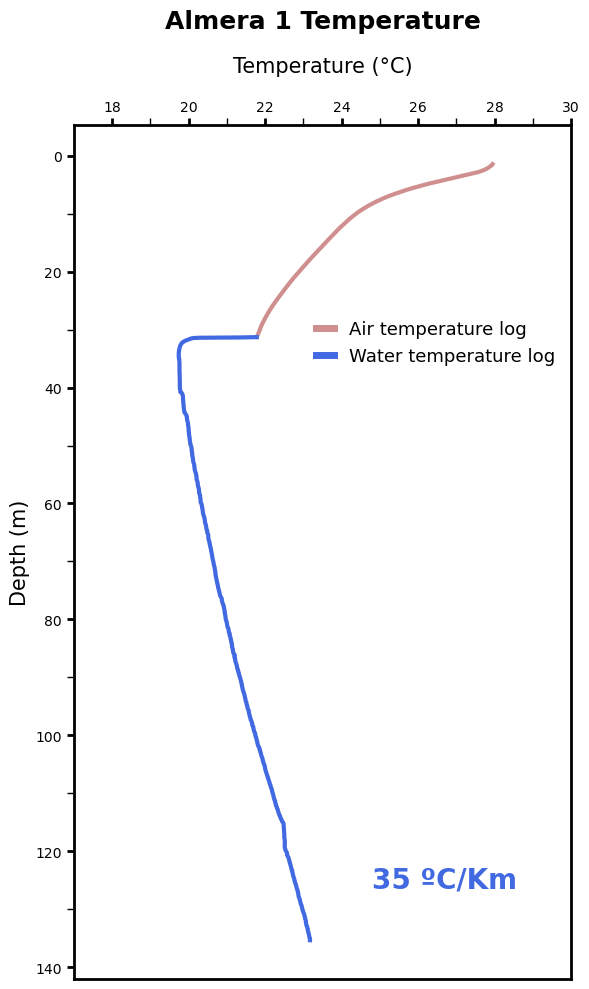

In [ ]:

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(6, 10)) # Se especifica un tamaño de figura de 6x10 pulgadas.

# Graficar la curva 
ax.plot(df_aire["Temperature"], df_aire["Depth"],  # Se grafican los datos de temperatura del aire
                       color='#D08F8F', linewidth=3, label='Air temperature log')

ax.plot(df_agua["Temperature"], df_agua["Depth"],  # Se grafican los datos de temperatura del agua
                       color='royalblue', linewidth=3, label='Water temperature log')

# Configuración de los ejes
ax.set_xlabel('Temperature (°C)', fontsize=15, labelpad=20)  # Establecer el título para el eje X (Aumenta separación con labelpad)
ax.set_ylabel('Depth (m)', fontsize=15) # Establecer el título para el eje Y (Profundidad)

ax.set_xlim(17, 30)  # Establecer límites en el eje X
ax.invert_yaxis()  # Invertir el eje Y para que la profundidad aumente hacia abajo 

# Configuración del eje x y y
ax.xaxis.set_ticks_position("top") # Configuración de los ticks del eje X (ubicación de los ticks en la parte superior)
ax.xaxis.set_label_position("top") # Alineación de la etiqueta del eje X también en la parte superior
ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Establecer localizadores de los ticks principales del eje X con valores enteros
ax.xaxis.set_major_locator(MultipleLocator(2))  #cada 2 unidades
ax.xaxis.set_minor_locator(AutoMinorLocator(2)) # Establecer localizadores de los ticks menores en el eje X (cada 2 unidades más pequeñas)

# Configuración de los ticks del eje Y (cada 20 unidades para los principales y con 2 para los menores)
ax.yaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# Hacer que los ticks que sean más gruesos y largos
ax.tick_params(axis='both', which='major', width=2, length=5, labelsize=10)  # Ticks principales
ax.tick_params(axis='both', which='minor', width=1, length=5)  # Ticks menores

# Hacer más grueso el borde del gráfico
for spine in ax.spines.values():
    spine.set_linewidth(2)  # Se aplica un grosor de línea de 2 píxeles al borde del gráfico (spines)

# Agregar título al gráfico
ax.set_title('Almera 1 Temperature', fontsize=18, fontweight='bold', pad=20)

# Definir los elementos de la leyenda con líneas personalizadas
legend_elements = [
    Line2D([0], [0], color='#D08F8F', lw=5, label='Air temperature log'),  # Línea más gruesa valor lw
    Line2D([0], [0], color='royalblue', lw=5, label='Water temperature log')  # Línea más gruesa valor lw
]

# Crear la leyenda usando los elementos personalizados y ajustando su ubicación
legend = ax.legend(handles=legend_elements, loc='lower right', bbox_to_anchor=(1, 0.7), fontsize=13, handlelength=1)

legend.get_frame().set_linewidth(0)  # Eliminar el contorno de la leyenda

# Agregar un texto con el valor del gradiente de temperatura en agua en la posición deseada
ax.text(0.6, 0.1, f'{water_gradient:.0f} ºC/Km', 
        transform=ax.transAxes, fontsize=20, color='royalblue', 
        verticalalignment='bottom', horizontalalignment='left', fontweight='bold')

# Ajustar el diseño para que no se solapen los elementos
plt.tight_layout()

# Exportar la figura como PNG y PDF
#plt.savefig(f"datos_png_pdf/Almera1_Temperatura.png", dpi=300)
#plt.savefig(f"datos_png_pdf/Almera1_Temperatura.pdf", format='pdf')

# Mostrar el gráfico en pantalla
plt.show()


Perfil con las Curvas de Temperatura y Gradiente de Temperatura 

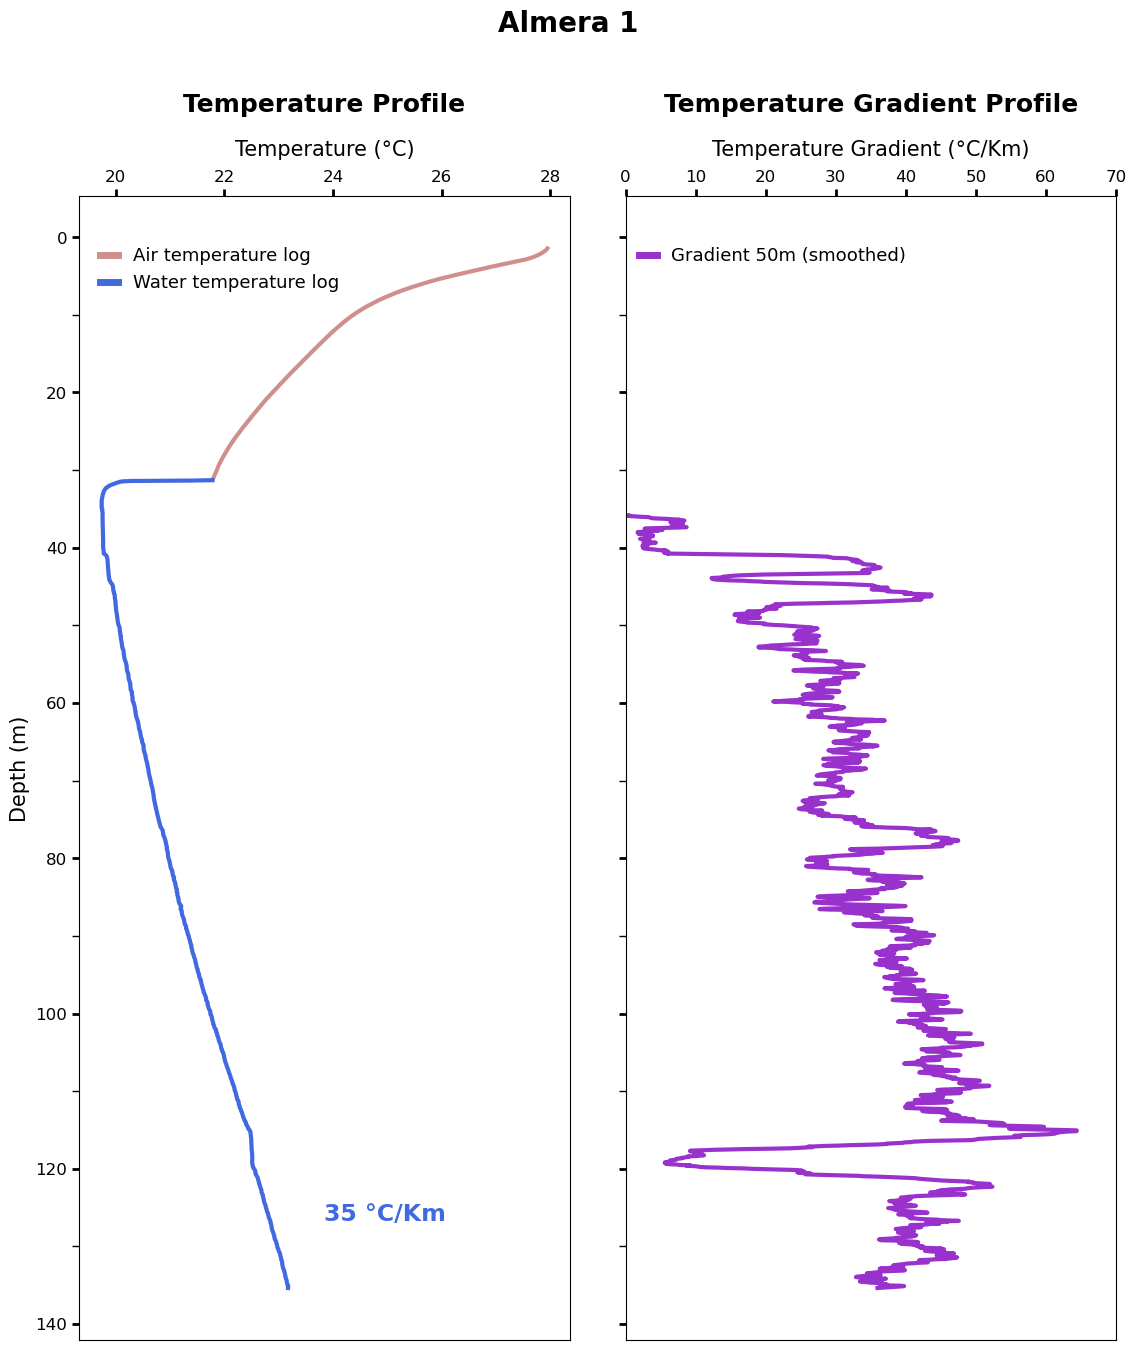

In [ ]:

# Crear la figura y los subgráficos (2 en una fila)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 14), sharey=True) # `sharey=True` hace que los dos gráficos compartan el eje Y (profundidad).

## Primer subgráfico para la curva de temperatura
axs[0].plot(df_aire["Temperature"], df_aire["Depth"], color='#D08F8F', linewidth=3, label='Air temperature log')
axs[0].plot(df_agua["Temperature"], df_agua["Depth"], color='royalblue', linewidth=3, label='Water temperature log')

# Configuración del primer subgráfico (Temperatura)
axs[0].set_xlabel('Temperature (°C)', fontsize=15, labelpad=10)
axs[0].set_ylabel('Depth (m)', fontsize=15)
axs[0].invert_yaxis()  # Invertir el eje Y para que 0m esté arriba

axs[0].set_title('Temperature Profile', fontsize=18, fontweight='bold', pad=20) # Título con mayor tamaño de fuente y estilo en negrita.

# Definir los elementos de la leyenda con líneas personalizadas
legend_elements = [
    Line2D([0], [0], color='#D08F8F', lw=5, label='Air temperature log'),  # Línea más gruesa
    Line2D([0], [0], color='royalblue', lw=5, label='Water temperature log')  # Línea más gruesa
]

# Añadir la leyenda al primer gráfico
axs[0].legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.01, 0.97), fontsize=13, handlelength=1, frameon=False)

# Configuración de los ticks y el formato de la cuadrícula en el primer subgráfico
axs[0].tick_params(axis='both', which='major', width=2, length=5, labelsize=12)
axs[0].tick_params(axis='both', which='minor', width=1, length=5)
axs[0].yaxis.set_major_locator(MultipleLocator(20))
axs[0].yaxis.set_minor_locator(AutoMinorLocator(2))

# Añadir el gradiente medio en el gráfico de temperatura
axs[0].text(0.5, 0.1, f'{water_gradient:.0f} °C/Km', transform=axs[0].transAxes, 
            fontsize=17, color='royalblue', ha='left', va='bottom', fontweight='bold')

# Suavizar el gradiente con un filtro de media móvil de 50 metros
gradiente_suavizado = data["Gradient"].rolling(window=50).mean()

## Segundo subgráfico para el gradiente de temperatura
axs[1].plot(gradiente_suavizado, data["Depth"], color='darkorchid', lw=3, label='Gradient 50m (smoothed)')

# Configuración del segundo subgráfico (Gradiente)
axs[1].set_xlabel('Temperature Gradient (°C/Km)', fontsize=15, labelpad=10)
axs[1].set_xlim(0, 70)  # Limitar el rango del eje X de gradiente
axs[1].set_title('Temperature Gradient Profile', fontsize=18, fontweight='bold', pad=20)

# Añadir la leyenda al segundo gráfico
axs[1].legend(handles=[Line2D([0], [0], color='darkorchid', lw=5, label='Gradient 50m (smoothed)')], 
              loc='upper center', bbox_to_anchor=(0.3, 0.97), fontsize=13, handlelength=1, frameon=False)

# Se ajustan los ticks en el eje X y Y de forma similar al primer subgráfico.
axs[1].tick_params(axis='both', which='major', width=2, length=5, labelsize=12)
axs[1].tick_params(axis='both', which='minor', width=1, length=5)
axs[1].yaxis.set_major_locator(MultipleLocator(20))
axs[1].yaxis.set_minor_locator(AutoMinorLocator(2))

# Eliminar la etiqueta de profundidad en el gráfico del gradiente
axs[1].set_ylabel('')  # Eliminar el ylabel (profundidad)

# Mover el eje X a la parte superior para ambos gráficos
for ax in axs:
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')

# Añadir un título conjunto para ambos gráficos
fig.suptitle('Almera 1', fontsize=20, fontweight='bold', y=0.98)

# Ajustar el diseño para que no se solapen los elementos
plt.tight_layout(pad=3.0)

# Guardar la figura como PNG y PDF
#plt.savefig(f"datos_png_pdf/Almera1_Temperatura_Gradiente.png", dpi=300)
#plt.savefig(f"datos_png_pdf/Almera1_Temperatura_Gradiente.pdf", format='pdf')

# Mostrar la figura 
plt.show()


### <a id="codigo-completo"></a> <span style="color:#FFB3A7; font-size:20px"> **Código completo** </span>
***

Codigo completo de la curva de temperatura mostrado paso a paso en este notebook: 

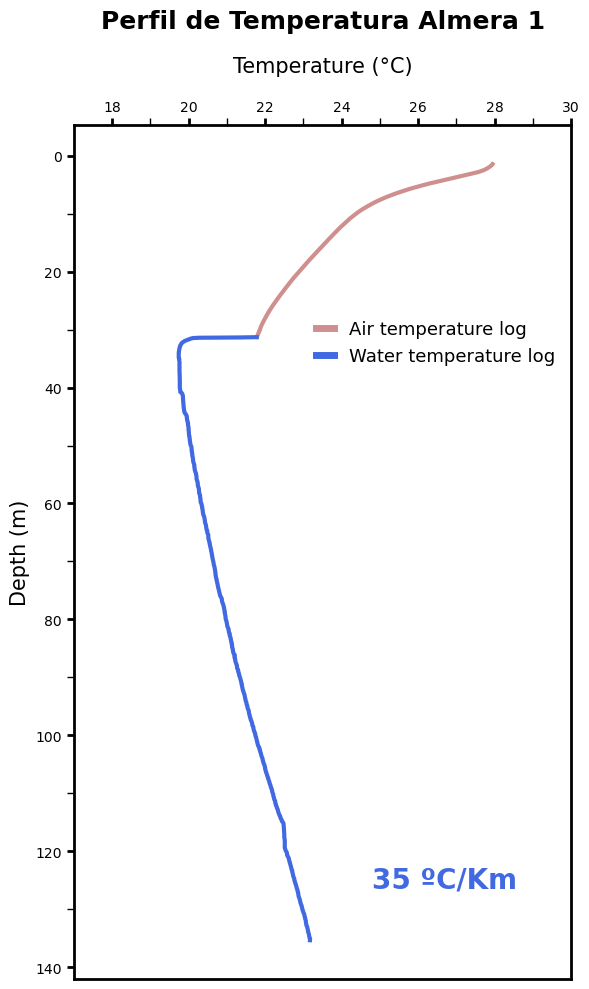

In [ ]:
import pandas as pd
from scipy.stats import linregress  # Para ajuste lineal
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, MaxNLocator
from matplotlib.lines import Line2D  # Importar Line2D para crear los elementos de la leyenda


# Cargar datos desde el archivo TXT
data = pd.read_csv("datos_txt/Bcn_Almera1_Temperatura.txt", delim_whitespace=True, encoding="utf-8")

# Eliminar la fila de unidades en los datos de temperatura
data = data.iloc[1:].copy()  

# Convertir datos a numéricos
data = data.apply(pd.to_numeric, errors='coerce')

# Definir la profundidad mínima del agua
profundidad_agua = 31.3

# Filtrar datos desde la profundidad de 31.3 metros en adelante
df_filtrado = data[data["Depth"] >= profundidad_agua].copy()

# Calculamos el gradiente medio en agua
# Ajustar regresión lineal (Temperatura vs Profundidad)
slope, intercept, r_value, p_value, std_err = linregress(df_filtrado["Depth"], df_filtrado["Temperature"])

# Convertir el gradiente de °C/m a °C/Km
water_gradient = slope * 1000  # Convertir a °C/Km

# Calculamos el gradiente para cada profundidad en el sondeo
# Crear columna de gradiente térmico (NaN en la primera fila porque no tiene diferencia)
data["Gradient"] = (data["Temperature"].diff() / 0.05) * 1000 #en Km

# Filtrar datos para el agua (profundidades mayores o iguales a 31.3 m)
df_agua = data[data["Depth"] >= profundidad_agua].copy()

# Filtrar datos para el aire (profundidades menores a 31.3 m)
df_aire = data[data["Depth"] < profundidad_agua].copy()

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(6, 10))

# Graficar la curva 
df_agua = data[data["Depth"] >= profundidad_agua].copy()
df_aire = data[data["Depth"] < profundidad_agua].copy()

ax.plot(df_aire["Temperature"], df_aire["Depth"], 
                       color='#D08F8F', linewidth=3, label='Air temperature log')

ax.plot(df_agua["Temperature"], df_agua["Depth"], 
                       color='royalblue', linewidth=3, label='Water temperature log')

# Configuración de los ejes
ax.set_xlabel('Temperature (°C)', fontsize=15, labelpad=20)  # Aumenta separación con labelpad
ax.set_ylabel('Depth (m)', fontsize=15)

ax.set_xlim(17, 30)  # Rango de temperatura
ax.invert_yaxis()  # Invertir eje Y para que 0m esté arriba


# Configuración del eje x y y
ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))  
ax.xaxis.set_major_locator(MultipleLocator(2))  
ax.xaxis.set_minor_locator(AutoMinorLocator(2))

ax.yaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# Hacer más grueso y largo los ticks
ax.tick_params(axis='both', which='major', width=2, length=5, labelsize=10)  # Ticks principales
ax.tick_params(axis='both', which='minor', width=1, length=5)  # Ticks menores

# Hacer más grueso el borde del gráfico
for spine in ax.spines.values():
    spine.set_linewidth(2)  # Grosor del marco del gráfico

# Agregar título
ax.set_title('Perfil de Temperatura Almera 1', fontsize=18, fontweight='bold', pad=20)

# Definir los elementos de la leyenda con líneas personalizadas
legend_elements = [
    Line2D([0], [0], color='#D08F8F', lw=5, label='Air temperature log'),  # Línea más gruesa
    Line2D([0], [0], color='royalblue', lw=5, label='Water temperature log')  # Línea más gruesa
]

# Crear la leyenda usando los elementos personalizados
legend = ax.legend(handles=legend_elements, loc='lower right', bbox_to_anchor=(1, 0.7), fontsize=13, handlelength=1)

legend.get_frame().set_linewidth(0)  # Eliminar el contorno de la leyenda

# Agregar el texto con el gradiente en agua
ax.text(0.6, 0.1, f'{water_gradient:.0f} ºC/Km', 
        transform=ax.transAxes, fontsize=20, color='royalblue', 
        verticalalignment='bottom', horizontalalignment='left', fontweight='bold')

plt.tight_layout()

# Exportar la figura como PNG y PDF
#plt.savefig(f"datos_png_pdf/Almera1_Temperatura.png", dpi=300)
#plt.savefig(f"datos_png_pdf/Almera1_Temperatura.pdf", format='pdf')
plt.show()